## Q2

### 1A

In [16]:
# NORMAL.PY

import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

#imput parameters
x_mean=1.
standard_deviation=2.
df = pd.DataFrame({'sample size':[], '<x>':[], '|<x> - x_mean|^2':[]})

for sample_size in tqdm(range(10000, 100000000, 100000)):
    
    # numpy function to sample the normal distribution
    x_norm=np.random.normal(x_mean,standard_deviation,sample_size)
    new_df = pd.DataFrame({'sample size':[sample_size], '<x>':[x_norm.mean()], '|<x> - x_mean|^2':[(abs(x_norm.mean()-x_mean))**2]})
    df = pd.concat([df, new_df], ignore_index=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [14:19<00:00,  1.16it/s]


In [40]:
df.to_csv('SQM_data.csv')

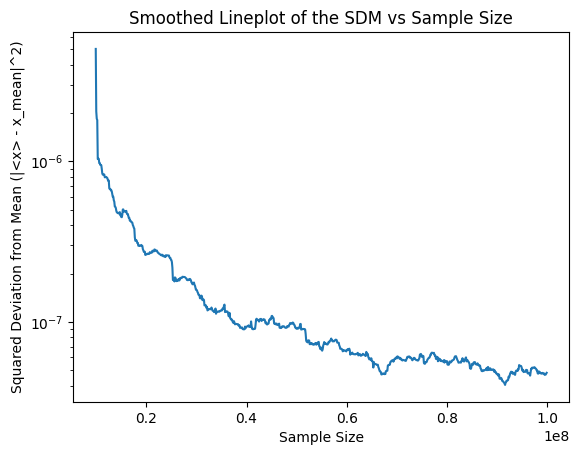

In [39]:
# Applying a rolling window for smoothing
df['smoothed_deviation'] = df['|<x> - x_mean|^2'].rolling(window=100).mean()

# Plot the smoothed data
sns.lineplot(data=df, x='sample size', y='smoothed_deviation')
plt.yscale('log')
plt.ylabel('Squared Deviation from Mean (|<x> - x_mean|^2)')
plt.xlabel('Sample Size')
plt.title('Smoothed Lineplot of the SDM vs Sample Size')
plt.show()

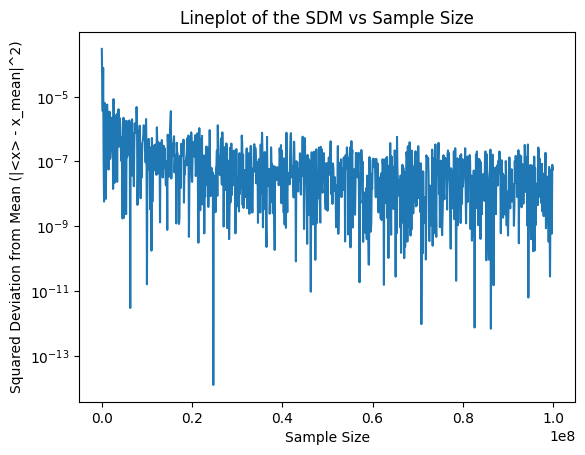

In [33]:
sns.lineplot(data=df, x='sample size', y='|<x> - x_mean|^2')
plt.yscale('log')
plt.ylabel('Squared Deviation from Mean (|<x> - x_mean|^2)')
plt.xlabel('Sample Size')
plt.title('Lineplot of the SDM vs Sample Size')
plt.show()

### 1B

In [52]:
# Reported Input Parameters
x_mean = 1.
standard_deviation = 2.
sample_size = 1000000

# Numpy function to sample the normal distribution
x_norm=np.random.normal(x_mean,standard_deviation,sample_size)

# Answers for variance and stddev (calculated with Numpy)
print(f'The variance of this sample is {np.var(x_norm)}')
print(f'The standard deviation of this sample is {math.sqrt(np.var(x_norm))}')

The variance of this sample is 4.002788226897621
The standard deviation of this sample is 2.000696935294704


### 1C

In [63]:
# Input Parameters 
x_mean = 1.
standard_deviation = 2.
sample_size_1000=np.random.normal(x_mean,standard_deviation,1000)
sample_size_10000=np.random.normal(x_mean,standard_deviation,10000)
sample_size_100000=np.random.normal(x_mean,standard_deviation,100000)
sample_size_x_norm_1000000=np.random.normal(x_mean,standard_deviation,1000000)

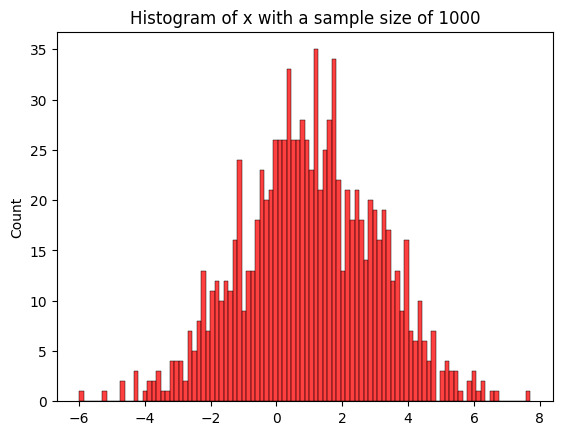

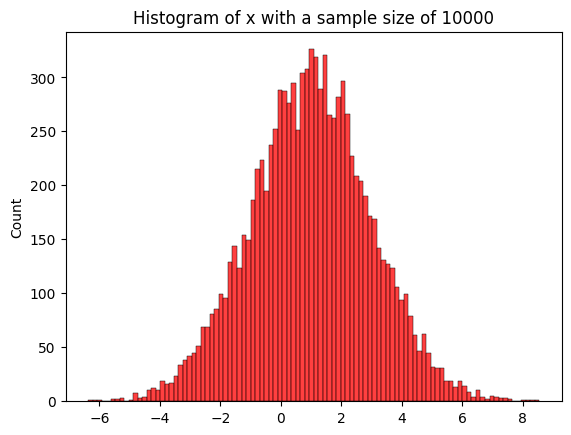

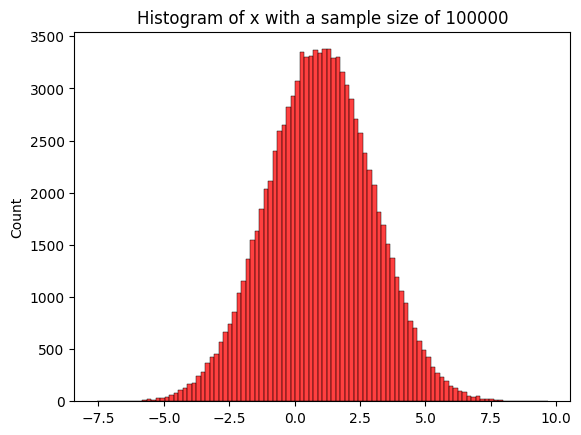

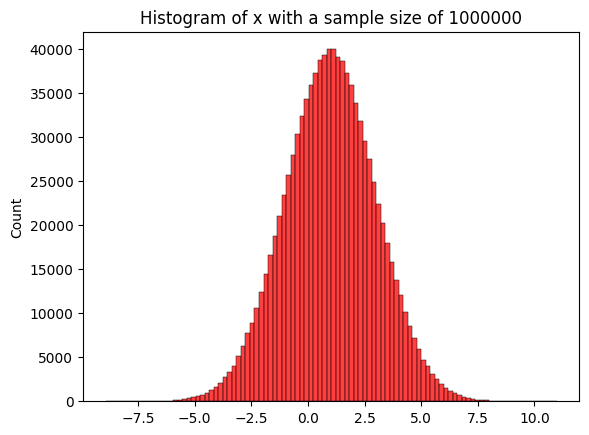

In [68]:
for data in [[x_norm_1000, '1000'], [x_norm_10000, '10000'], [x_norm_100000, '100000'], [x_norm_1000000, '1000000']]:
    sns.histplot(data[0], bins=100, color='red')
    plt.title(f'Histogram of x with a sample size of {data[1]}')
    plt.show()

## Q2

In [72]:
# UNIFORM.PY
import numpy as np
sample_size=10000
x_uniform=np.random.random(sample_size)

In [112]:
df = pd.DataFrame({'sample size':[], '<x>':[]})

for sample_size in tqdm(range(1000, 1000000, 1000)):
    x_uniform=np.random.random(sample_size)
    new_df = pd.DataFrame({'sample size':[sample_size], '<x>':[x_uniform.mean()]})
    df = pd.concat([df, new_df], ignore_index=True)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999/999 [00:02<00:00, 394.84it/s]


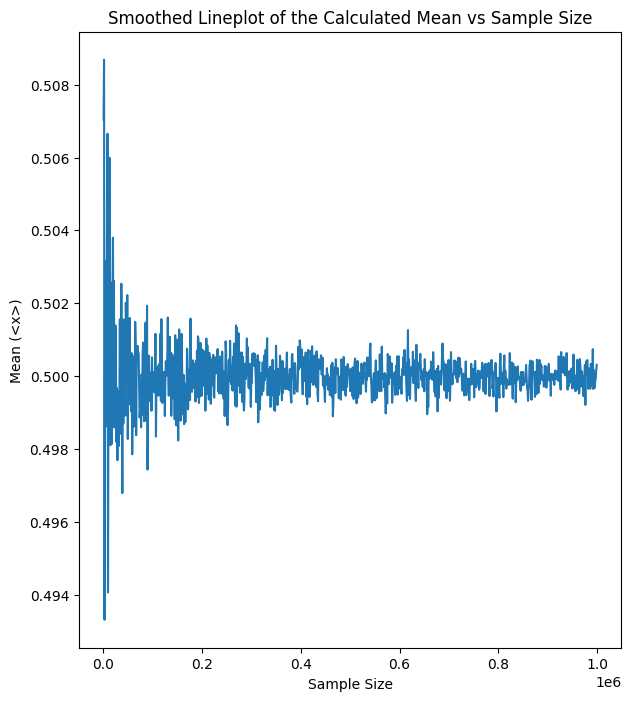

In [114]:
plt.figure(figsize=(7, 8))
sns.lineplot(data=df, x='sample size', y='<x>')

plt.ylabel('Mean (<x>)')
plt.xlabel('Sample Size')
plt.title('Smoothed Lineplot of the Calculated Mean vs Sample Size')
plt.show()

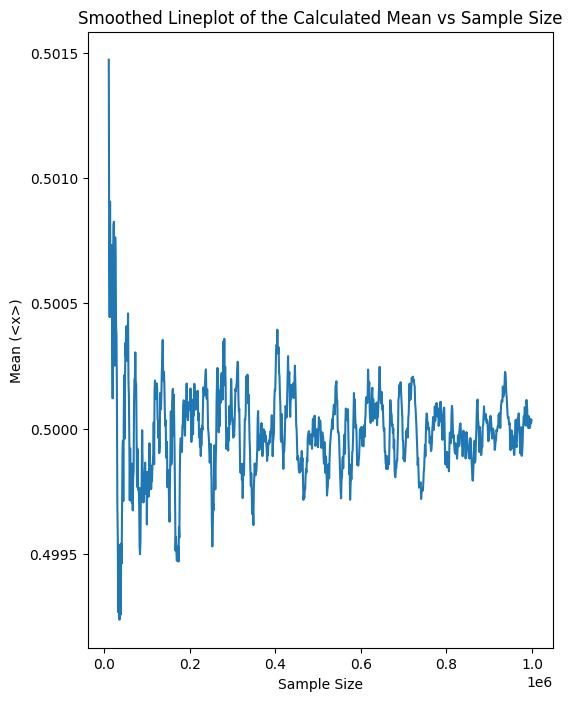

In [115]:
# Applying a rolling window for smoothing
df['smoothed_<x>'] = df['<x>'].rolling(window=11).mean()

plt.figure(figsize=(6, 8))
sns.lineplot(data=df, x='sample size', y='smoothed_<x>')
plt.ylabel('Mean (<x>)')
plt.xlabel('Sample Size')
plt.title('Smoothed Lineplot of the Calculated Mean vs Sample Size')
plt.show()

In [117]:
# 2c)

import numpy as np

# Define the sample size
sample_size = 10000

# Generate random values between -1 and 3
# To do this, use the formula: a + (b - a) * np.random.random(size)
# where a is the lower bound and b is the upper bound
x_uniform = -1 + (3 - (-1)) * np.random.random(sample_size)

# Open the file to write the generated values
with open('x_uniform.dat', 'w') as f:
    for x in x_uniform:
        f.write(f"{x}\n")  # Writing each random number to the file

print("Random numbers between -1 and 3 have been generated and written to 'x_uniform.dat'.")

Random numbers between -1 and 3 have been generated and written to 'x_uniform.dat'.


<Axes: ylabel='Count'>

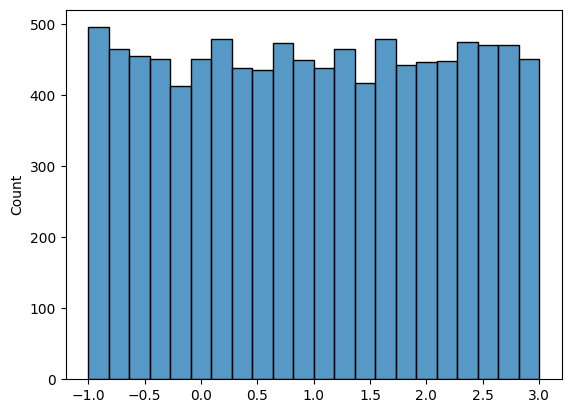

In [119]:
sns.histplot(x_uniform)`

## Q3

In [138]:
# 3b)

import numpy as np

for sample_size in [100, 1000, 10000, 100000, 1000000, 10000000, 100000000]:
    x=np.random.random(sample_size)
    y=np.random.random(sample_size)
    in_the_circle = 0
    for i in range(sample_size):
        if x[i]**2 + y[i]**2 <= 1:
            in_the_circle += 1
    
    # Approximate π using the method I described in part A
    print(f'Estimate for a sample size of {sample_size} is {in_the_circle/sample_size * 4}')

Estimate for a sample size of 100 is 3.16
Estimate for a sample size of 1000 is 3.14
Estimate for a sample size of 10000 is 3.1348
Estimate for a sample size of 100000 is 3.1458
Estimate for a sample size of 1000000 is 3.13956
Estimate for a sample size of 10000000 is 3.1411036
Estimate for a sample size of 100000000 is 3.14146944


In [140]:
# 3c)

def estimate_pi(sample_size):
    x = np.random.random(sample_size)
    y = np.random.random(sample_size)
    in_the_circle = 0
    for i in range(sample_size):
        if x[i]**2 + y[i]**2 <= 1:
            in_the_circle += 1
    return in_the_circle / sample_size * 4

# Function to compute standard error
def compute_standard_error(sample_size, num_trials=100):
    pi_estimates = []
    
    # Perform multiple trials to calculate π estimates
    for _ in range(num_trials):
        pi_estimates.append(estimate_pi(sample_size))
    
    # Compute mean and standard deviation of π estimates
    mean_pi = np.mean(pi_estimates)
    std_dev_pi = np.std(pi_estimates)
    
    # Calculate standard error
    standard_error = std_dev_pi / np.sqrt(num_trials)
    
    print(f"Sample size: {sample_size}, Mean π: {mean_pi}, Standard Error: {standard_error}")

# Run the standard error calculation for different sample sizes
for sample_size in [100, 1000, 10000, 100000, 1000000, 10000000]:
    compute_standard_error(sample_size)


Sample size: 100, Mean π: 3.1515999999999997, Standard Error: 0.01584217156831727
Sample size: 1000, Mean π: 3.14424, Standard Error: 0.004102611851004189
Sample size: 10000, Mean π: 3.140952000000001, Standard Error: 0.0016702936747769836
Sample size: 100000, Mean π: 3.1413108, Standard Error: 0.000580923913778731
Sample size: 1000000, Mean π: 3.1416828399999996, Standard Error: 0.00015503054971198344
Sample size: 10000000, Mean π: 3.1415515960000007, Standard Error: 4.8724243327526635e-05
